In [1]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\annav\OneDrive\Desktop\NaturalLanguageProcessing_tests\hw4_nlp\final_ab_ds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54976 entries, 0 to 54975
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      54976 non-null  int64  
 1   person_id       54976 non-null  int64  
 2   procalcitonine  54976 non-null  float64
 3   fibrinogen      42093 non-null  float64
 4   creatinine      54967 non-null  float64
 5   wbc             54970 non-null  float64
 6   hb              54970 non-null  float64
 7   plt             54957 non-null  float64
 8   crp             54930 non-null  float64
 9   esr             46623 non-null  float64
 10  lymph           54928 non-null  float64
 11  pneumonia       54976 non-null  int64  
 12  ihd             54976 non-null  int64  
 13  dm              54976 non-null  int64  
 14  ah              54976 non-null  int64  
 15  sex             54976 non-null  int64  
 16  len             54976 non-null  int64  
 17  age             54976 non-null 

In [4]:
df = df.dropna()

In [5]:
neg, pos = np.bincount(df['ab_indication'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.1f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 35680
    Positive: 8873 (24.9% of total)



Отметим, что данные несбалансированы

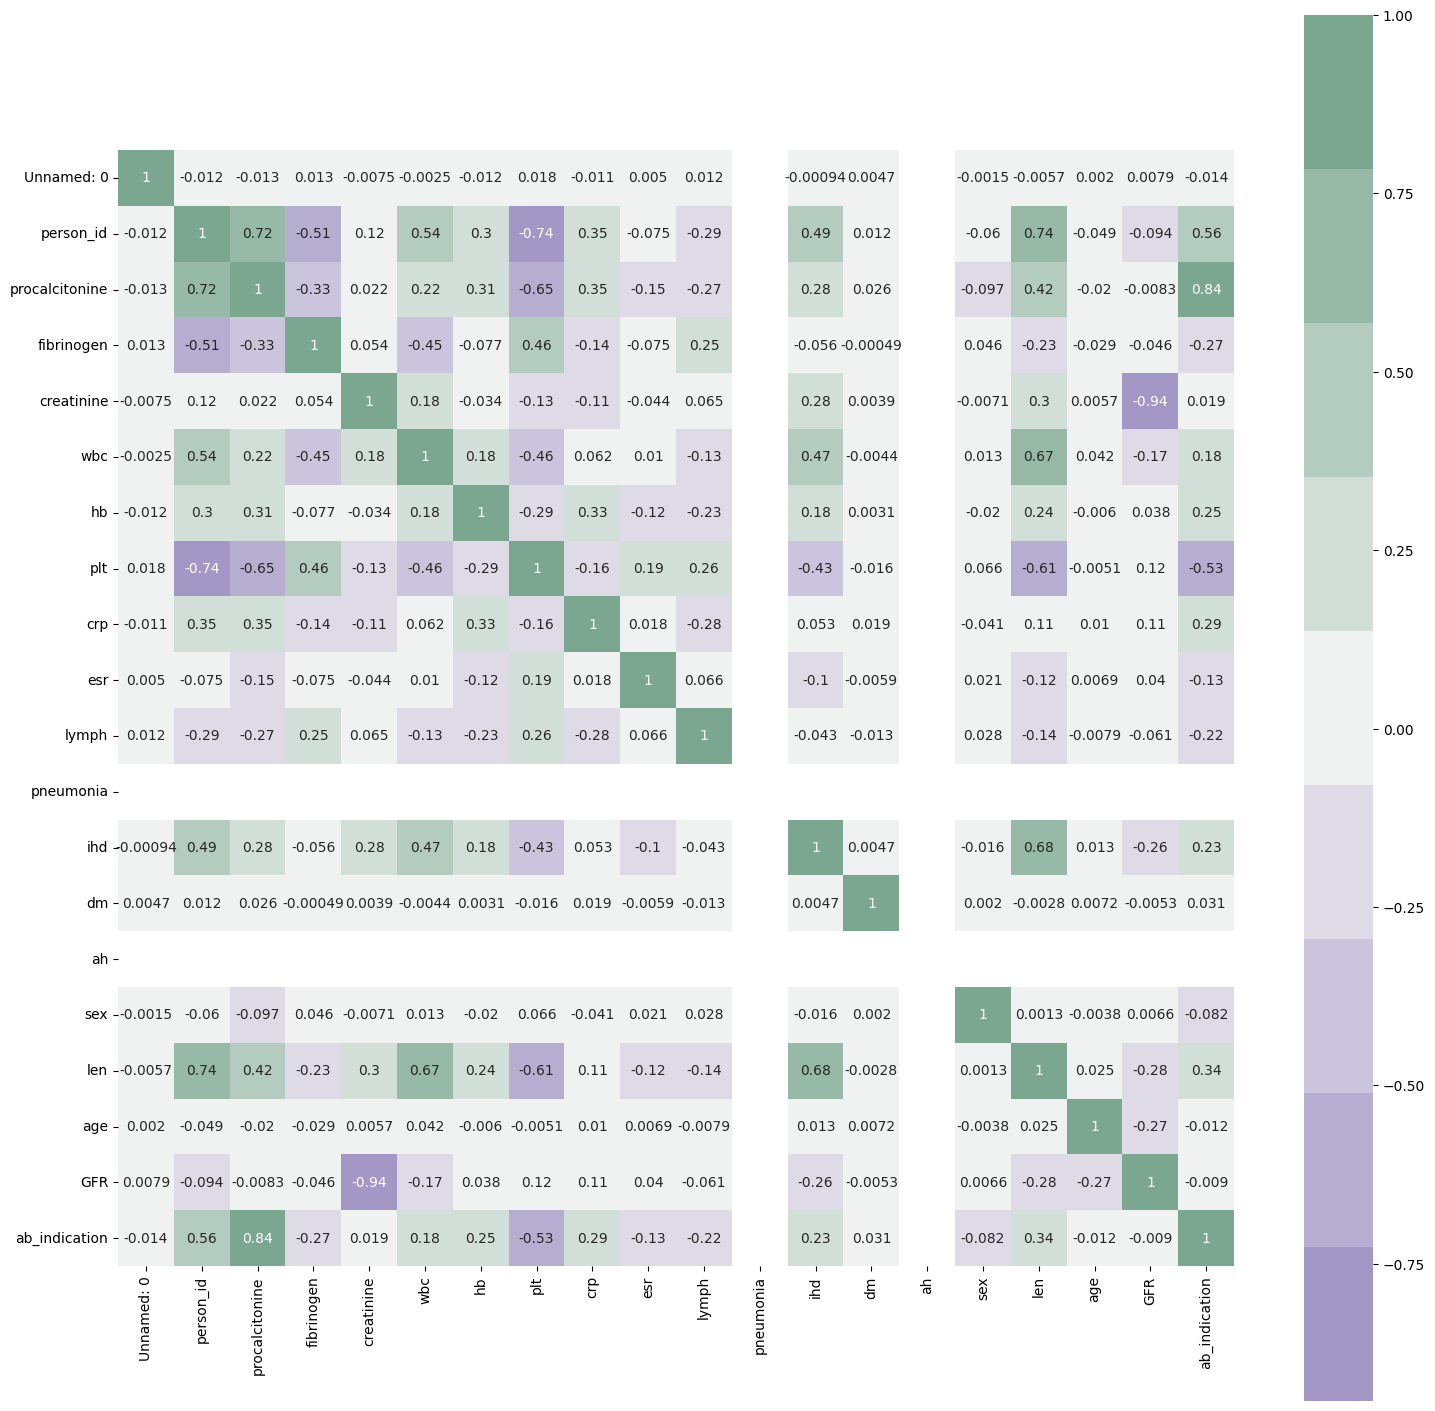

In [6]:
#Построим корреляционную матрицу
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, cmap= cmap, annot=True, square=True);

In [7]:
columns =['plt', 'esr', 'fibrinogen', 'creatinine', 'wbc',  'crp','lymph']
df_no_ind = df[df['ab_indication'] == 0]
df_ind = df[df['ab_indication'] == 1]

In [8]:
df_no_ind

,Unnamed: 0,person_id,procalcitonine,fibrinogen,creatinine,wbc,hb,plt,crp,esr,lymph,pneumonia,ihd,dm,ah,sex,len,age,GFR,ab_indication
1,3822,158,0.000000,8.909846,1.030282,1.363834,143.647123,644.437365,58.343027,34.424705,23.300684,1,0,0,0,1,17,56,60.894798,0
2,915492,342,0.000000,7.092240,1.027174,25.710224,130.864644,483.261016,0.800000,25.493102,27.004637,1,0,0,0,1,34,56,61.117621,0
3,641908,108,0.134918,13.265546,0.707201,0.410000,141.945473,477.671705,7.526411,46.599795,17.167563,1,0,0,0,1,26,56,95.972393,0
4,89879,108,0.000000,15.336425,1.094880,12.546527,120.607466,704.633325,27.180197,35.411333,15.268175,1,0,0,0,1,28,56,56.578279,0
5,744110,980,0.324985,9.899282,1.265045,7.001120,125.988145,166.613698,0.800000,27.280940,12.404405,1,1,0,0,1,33,48,50.257856,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41224,718264,706,0.112622,11.122910,0.954530,13.101311,141.795781,374.247891,21.111733,19.814036,12.839993,1,1,0,0,1,42,56,66.784947,0
41225,556216,1103,0.199631,7.135134,1.099085,36.772744,137.856675,178.047896,48.956390,17.813114,0.010000,1,0,0,0,1,39,35,65.268376,0
41227,144924,1013,0.335003,4.822600,0.905691,19.587708,136.475023,261.638296,115.226867,41.099277,10.731909,1,0,0,0,1,28,35,82.474743,0
41229,818312,1103,0.125672,2.440000,0.957168,39.037341,163.876818,161.291325,127.079600,22.661706,13.759877,1,1,0,0,1,52,26,82.177240,0


In [9]:
import warnings
warnings.filterwarnings('ignore')
for i in columns:
  lst1 = df_no_ind[i]
  lst2 = df_ind[i]
  shapiro_test = stats.shapiro(lst1) # тест шапиро-уилка
  shapiro_test2 = stats.shapiro(lst2) # тест шапиро-уилка
  if shapiro_test[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test[1]))
  if shapiro_test2[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test2[1]))
  else:
    pass

Данные plt распределены ненормально,           p-value - 1.5900588566632336e-20
Данные plt распределены ненормально,           p-value - 7.237914522152905e-47
Данные esr распределены ненормально,           p-value - 1.1770723532313181e-40
Данные esr распределены ненормально,           p-value - 1.392579617834783e-30
Данные fibrinogen распределены ненормально,           p-value - 9.052275578863804e-20
Данные fibrinogen распределены ненормально,           p-value - 4.40147617694549e-27
Данные creatinine распределены ненормально,           p-value - 1.8625010377532536e-23
Данные creatinine распределены ненормально,           p-value - 3.273536824833956e-13
Данные wbc распределены ненормально,           p-value - 2.6084998117038834e-60
Данные wbc распределены ненормально,           p-value - 9.905119130316824e-29
Данные crp распределены ненормально,           p-value - 2.4787564163861844e-80
Данные crp распределены ненормально,           p-value - 9.303236947157292e-34
Данные lymph распред

p-value не ниже 0.05, т.о мы  отвергаем нулевую гипотезу о нормальности распределения и будем работать с данными используя непараметрические стат.методы

In [10]:
def Basic_statistics(lst_1, lst_2):
    """ 
    Функция "Базовые статистики"

    На вход получает 2 списка данных для сравнения.
    На выходе получаем p-values, при сравнении признаков. 
    В частности: показаны, не показаны антибиотики
    """
    res_kw = kruskal(lst_1, lst_2)## краскела уолиса
    anova = stats.f_oneway(lst_1, lst_2) #тест анова
    return res_kw[1],  anova[1]

In [11]:
for col in columns:
  lst1 = df_no_ind[col]
  lst2 = df_ind[col]
  kw =  Basic_statistics(lst1, lst2)[0]
  an =  Basic_statistics(lst1, lst2)[1]
  if kw < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Крускала-Уоллиса'.format(col,  kw))
  if an < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Анова'.format(col,  an))
  else:
    pass


Данные plt статисически значимо различаются в подгруппах,           p-value - 0.0, тест Крускала-Уоллиса
Данные plt статисически значимо различаются в подгруппах,           p-value - 0.0, тест Анова
Данные esr статисически значимо различаются в подгруппах,           p-value - 2.7536251235414657e-121, тест Крускала-Уоллиса
Данные esr статисически значимо различаются в подгруппах,           p-value - 2.1921373115857108e-126, тест Анова
Данные fibrinogen статисически значимо различаются в подгруппах,           p-value - 0.0, тест Крускала-Уоллиса
Данные fibrinogen статисически значимо различаются в подгруппах,           p-value - 0.0, тест Анова
Данные creatinine статисически значимо различаются в подгруппах,           p-value - 0.003026493786471801, тест Крускала-Уоллиса
Данные creatinine статисически значимо различаются в подгруппах,           p-value - 0.0003838304871477176, тест Анова
Данные wbc статисически значимо различаются в подгруппах,           p-value - 9.49496142847372e-224, 

#### Выводы:


- 1.   В подгруппах есть  статистически значимые различия
- 2.   На данном этапе есть оснований полагать, что есть некая закономерность в анализах у пациентов с показаниями к антибиотикотерапии 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# разделяем набор данных на тренировочную, тестовую и валидационную части и нормализуем данные
X = df.drop('ab_indication', axis=1)
Y = df['ab_indication']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.20,
                                                    stratify = Y,
                                                    random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                  test_size = 0.20,
                                                  stratify = Y_train,
                                                  random_state = 42)

# Домашнее занятие 4
**Этап построения модели машинного обучения**

---
Стандартные шаги перед обучением (стандартизация/нормализаця), решение необходомости ресамплинга из-за дисбаланса данных, выбор параметров модели и бизнесс логика - ***ваше домашнее задание***


# Бизнес логика

Результат вашего исследования не всегда будет соответствовать вашим ожиданиям (гипотезе). Более того, чем амбициознее решаемая задача, тем менее вероятно, что вы получите то, что хотели. Однако, хотелось бы отметить, что важнейшим качеством специалиста по работе с данными является гибкость (способность адаптироваться под меняющиеся обстоятельства и находить неординарные решения)




---


Как пример из моей недавней практики:

У департамента RWD фарм.компаниии, стояла задача предоставить для команды рекламщиков решения, для улучшения дистрибьюции препаратов.

Этот запрос был делегирован нашей DS команде для формулировки идей / подходов.
Выдвинутая гипотеза в предельно простом виде звучала следующим образом:  
*можем ли мы предсказать будущих пользователей на основе клинических и других признаков пациентов?*

После проведения подготовительных мероприятий, я преступил к построению датасета, модели, анализа метрик.
Оказалось, что модель обладает хорошей чувствительностью, однако, низкой специфичностью, а целевые метрики были субоптимальными.
Тогда возникла идея, трансформировать слабые стороны модели в преимущества и выдвинуть гипотезу 2: мы допускаем, что пациенты, имеющие ложноположительное предсказание могут иметь более высокую предрасположенность к тому, чтобы быть пользователями препарата, поэтому эта субпопуляция может являться таргетной группой для дополнительных маркетинговых воздействий.

Идея изложена в предельно незавуалированном виде, но она очень понравилась заказчику и теперь модель используется в продакшне.


# Пример решения NLP задачи из реальной практики (прототип)
---
Ранее мы использовали инструменты и подходы NLP для решения задач нашего локального исследования. 
> В домашнем задании №3, вы столкнулись с проблемой обозначения побочных эффектов в избранной онтологической системе. 

Давайте взглянем на вариант решения задачи, используя мощную библиотеку gensim, которая предоставляет возможность "word embeddings". Также, с моей стороны, было бы нечестно, задать вам ДЗ без объяснения вариантов решения продвинутых уровней :)

In [15]:
%pip install spacy
%pip install gensim
%pip install time
%pip install re

^C
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\annav\\AppData\\Roaming\\Python\\Python310\\site-packages\\~umpy.libs\\libscipy_openblas64_-43e11ff0749b8cbe0a615c9cf6737e0e.dll'
Check the permissions.

You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
import re
import time
import spacy
import gensim
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
# прочитаем наши датасеты, где таргет_вокаб - это то, к чему мы хотим превести, а ту_мап - что мы хотим перевести
adverse_effects = pd.read_csv(r'C:\Users\annav\OneDrive\Desktop\NaturalLanguageProcessing_tests\hw4_nlp\to_find', sep = '|')
CUIs = pd.read_csv(r'C:\Users\annav\OneDrive\Desktop\NaturalLanguageProcessing_tests\hw4_nlp\lesson4_CIUconcept.tsv', sep = '\t')
adverse_effects.head()

,id,Text
0,22,The vertigo is rendering me unable to function...
1,23,I am seeing a specialist for the vertigo and u...
2,24,My vertigo has not responded to conservative t...
3,25,"Muscle spasms, muscle twitching, muscle sorene..."
4,26,I took Lexapro for 3 days in 10mg doses and ha...


In [16]:
CUIs.head()

,CUI,CONCEPT,SNOMED_CODE
0,C0000765,"Excessive body weight gain,Excessive weight gain",224994002
1,C0701811,"Poor short-term memory,Poor short-term memory",247592009
2,C0002170,"Alopecia,Loss of hair",278040002
3,C0549622,"Sexual Dysfunction,Sexual disorder",231532002
4,C0027497,"Nausea,Nausea",422587007


In [18]:
%pip show en_core_sci_lg

Note: you may need to restart the kernel to use updated packages.


In [31]:
# скачать, если не установлено
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_lg-0.5.1.tar.gz

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_lg-0.5.1.tar.gz (532.3 MB)
Using legacy 'setup.py install' for en-core-sci-lg, since package 'wheel' is not installed.
    Running setup.py install for en-core-sci-lg: started
    Running setup.py install for en-core-sci-lg: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [28]:
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_lg-0.5.1.tar.gz

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_core_sci_lg-0.5.1.tar.gz (532.3 MB)
  Using cached spacy-3.4.4-cp310-cp310-win_amd64.whl (11.9 MB)
  Using cached pathy-0.11.0-py3-none-any.whl (47 kB)
Using legacy 'setup.py install' for en-core-sci-lg, since package 'wheel' is not installed.
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.4
    Uninstalling spacy-3.8.4:
      Successfully uninstalled spacy-3.8.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\annav\\AppData\\Roaming\\Python\\Python310\\site-packages\\~pacy\\attrs.cp310-win_amd64.pyd'
Check the permissions.

You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [33]:
# Загрузка модели для английского языка
nlp = spacy.load("en_core_sci_lg")

In [35]:
stop_words = ['noc', 'nos', '[d]', 'unknown_unit', '|', 'see comment', 'due', 'nec', 'unspecified', '[v]', '(see comments)']
# убрать ненужные слова (если, конечно, они вообще есть)
adverse_effects['adv_name_processed'] = adverse_effects['Text'].apply(lambda x: re.sub(r"\s+", " ", str(x).encode('ascii', 'ignore').decode()) if isinstance(x, str) else str(x))
CUIs['concept_name_processed'] = CUIs['CONCEPT'].apply(lambda x: re.sub(r"\s+", " ", str(x.encode('ascii', 'ignore').decode())))

In [36]:
# убрать пунктуацию, символы
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].map(lambda x: re.sub('[,\.!;?)%(\'\":\-]', '', x))
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].map(lambda x: re.sub('[,\.!;?)%(\'\":\-]', '', x))

In [37]:
# из верхнего регистра переведём всё в нижний
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].map(lambda x: x.lower())
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].map(lambda x: x.lower())

In [38]:
# уберём стоп слова
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [39]:
def tokenize(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
    return tokens

In [40]:
start_time = time.time()

adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].apply(tokenize)
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].apply(tokenize)

elapsed_time = (time.time() - start_time)/60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.1 секунд(ы)


In [41]:
def lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

In [42]:
start_time = time.time()
# Применение функции к вашему столбцу
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].apply(lambda x: lemmatize(' '.join(x)))
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].apply(lambda x: lemmatize(' '.join(x)))
elapsed_time = (time.time() - start_time)/60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.0 секунд(ы)


In [43]:
adverse_effects.head(10)

,id,Text,adv_name_processed
0,22,The vertigo is rendering me unable to function...,"[the, vertigo, be, render, I, unable, to, func..."
1,23,I am seeing a specialist for the vertigo and u...,"[I, be, see, a, specialist, for, the, vertigo,..."
2,24,My vertigo has not responded to conservative t...,"[my, vertigo, have, not, respond, to, conserva..."
3,25,"Muscle spasms, muscle twitching, muscle sorene...","[muscle, spasm, muscle, twitching, muscle, sor..."
4,26,I took Lexapro for 3 days in 10mg doses and ha...,"[I, take, lexapro, for, 3, day, in, 10, mg, do..."
5,27,Im sorry this is more about not taking it than...,"[I, m, sorry, this, be, more, about, not, take..."
6,30,Extreme Weight Gain 30 pounds.,"[extreme, weight, gain, 30, pound]"
7,31,"Excessive perspiration, Erectile dysfunction.","[excessive, perspiration, erectile, dysfunction]"
8,32,"Almost no libido at all, Utterly useless.","[almost, no, libido, at, all, utterly, useless]"
9,33,Took a while to have an effect on mood obvious...,"[take, a, while, to, have, an, effect, on, moo..."


In [44]:
CUIs.head(10)

,CUI,CONCEPT,SNOMED_CODE,concept_name_processed
0,C0000765,"Excessive body weight gain,Excessive weight gain",224994002,"[excessive, body, weight, gainexcessive, weigh..."
1,C0701811,"Poor short-term memory,Poor short-term memory",247592009,"[poor, shortterm, memorypoor, shortterm, memory]"
2,C0002170,"Alopecia,Loss of hair",278040002,"[alopecialoss, of, hair]"
3,C0549622,"Sexual Dysfunction,Sexual disorder",231532002,"[sexual, dysfunctionsexual, disorder]"
4,C0027497,"Nausea,Nausea",422587007,[nauseanausea]
5,C0344232,"Blurred vision,Blurring of visual image",111516008,"[blurred, visionblurring, of, visual, image]"
6,C0037316,"Sleep Deprivation,Sleep deprivation",130989002,"[sleep, deprivationsleep, deprivation]"
7,C0424000,"Feeling suicidal,Feeling suicidal",225457007,"[feel, suicidalfeele, suicidal]"
8,C0424565,"Cannot sleep at all,Cannot sleep at all",248255005,"[can, not, sleep, at, allcannot, sleep, at, all]"
9,C1971624,"Loss of appetite,Loss of appetite",79890006,"[loss, of, appetiteloss, of, appetite]"


In [45]:
adverse_effects['adv_name_processed'] = adverse_effects['adv_name_processed'].apply(lambda x: sorted(x))
CUIs['concept_name_processed'] = CUIs['concept_name_processed'].apply(lambda x: sorted(x))

In [47]:
# Загрузите предварительно обученную модель встраивания слов
model_path = r"C:\Users\annav\Downloads\BioWordVec_PubMed_MIMICIII_d200.vec.bin" # скачать здесь https://github.com/ncbi-nlp/BioSentVec
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)

In [49]:
# Функция для векторизации текста с использованием BioWordVec
def vectorize_text_with_gensim_embeddings(text, model):
    tokens = text.split()
    vectors = [model[token] for token in tokens if token in model]
    if vectors:
        return np.mean(vectors, axis=0)  # Усреднение векторов
    else:
        return np.zeros(model.vector_size)  # Возвращает нулевой вектор, если нет известных слов

In [50]:
start_time = time.time()
# Применение функции к медицинским терминам в обоих наборах данных
adverse_effects['adv_eff_vector'] = adverse_effects['adv_name_processed'].apply(lambda x: vectorize_text_with_gensim_embeddings(' '.join(x), word2vec_model))
CUIs['CUI_vector'] = CUIs['concept_name_processed'].apply(lambda x: vectorize_text_with_gensim_embeddings(' '.join(x), word2vec_model))
# Удаление строк с отсутствующими векторами
adverse_effects = adverse_effects.dropna(subset=['adv_eff_vector'])
CUIs = CUIs.dropna(subset=['CUI_vector'])
elapsed_time = (time.time() - start_time)/60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.0 секунд(ы)


In [51]:
start_time = time.time()
num_top_matches = 2
v1 = np.vstack(adverse_effects['adv_eff_vector'])
v2 = np.vstack(CUIs['CUI_vector'])
elapsed_time = (time.time() - start_time) / 60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.0 секунд(ы)


In [52]:
similarity = cosine_similarity(v1, v2)
tops = (-similarity).argsort()[:, :num_top_matches]

joined_table = pd.concat(
    [pd.concat( 
        [adverse_effects.loc[[i], ['Text', 'id']].reset_index(drop=True), 
         CUIs.loc[[t], ['CUI', 'CONCEPT']].reset_index(drop=True),
         pd.Series(similarity[i][t], name='Similarity')], axis= 1    
    )                       
     for i in range(0, len(adverse_effects)) for t in tops[i]]       
).reset_index(drop=True)

elapsed_time = (time.time() - start_time) / 60
print(f"Затраченное время: {elapsed_time:.1f} секунд(ы)")

Затраченное время: 0.2 секунд(ы)


In [54]:
joined_table.to_csv("hw4_nlp_med_akopeikina.csv", index=False)

In [57]:
from transformers import AutoModel, AutoTokenizer

model_name = "DeepPavlov/rubert-base-cased"  # Пример для русскоязычной модели
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [62]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
import numpy as np

# Шаг 1: Загрузка токенизатора и модели BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # или укажите свой путь к модели
model = BertModel.from_pretrained('bert-base-uncased')  # или укажите свой путь к модели

# Функция для извлечения эмбеддингов (среднее по токенам)
def get_embedding(text):
    # Токенизация текста
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state  # Получаем последние скрытые состояния

    # Усредняем эмбеддинги по всем токенам (среднее значение по токенам)
    sentence_embedding = last_hidden_states.mean(dim=1)  # Размерность [batch_size, hidden_size]
    
    # Преобразуем эмбеддинг в numpy массив
    return sentence_embedding.squeeze().numpy()

# Шаг 2: Загрузка данных из файлов
# Загружаем текст из файла ADR
adr_file = r"C:\Users\annav\OneDrive\Desktop\NaturalLanguageProcessing_tests\hw4_nlp\lesson4_ADR.txt"
ciuconcept_file = r"C:\Users\annav\OneDrive\Desktop\NaturalLanguageProcessing_tests\hw4_nlp\lesson4_CIUconcept.tsv"

# Загружаем текст из файла ADR (просто для примера, можно использовать концепты)
with open(adr_file, 'r', encoding='utf-8') as f:
    adr_text = f.read().splitlines()  # Предполагаем, что каждая строка в файле это отдельный текст

# Загружаем TSV файл в DataFrame
ciu_df = pd.read_csv(ciuconcept_file, sep='\t')

# Шаг 3: Обработка текста и извлечение эмбеддингов
# Применяем предобработку и извлечение эмбеддингов для каждого концепта
ciu_df['concept_name_processed'] = ciu_df['CONCEPT'].apply(lambda x: x.lower())  # Пример предобработки текста (приведение к нижнему регистру)
ciu_df['embedding'] = ciu_df['concept_name_processed'].apply(get_embedding)

# Шаг 4: Сохранение результата в CSV файл
# Для корректной записи эмбеддингов в CSV, преобразуем массив эмбеддингов в строку
ciu_df['embedding'] = ciu_df['embedding'].apply(lambda x: np.array2string(x, separator=',')[1:-1])  # Убираем квадратные скобки

ciu_df.to_csv("output_with_embeddings.csv", index=False)

# Печать первых нескольких строк результата
print(ciu_df.head())


         CUI                                           CONCEPT SNOMED_CODE  \
0  C0000765   Excessive body weight gain,Excessive weight gain   224994002   
1  C0701811      Poor short-term memory,Poor short-term memory   247592009   
2  C0002170                              Alopecia,Loss of hair   278040002   
3  C0549622                 Sexual Dysfunction,Sexual disorder   231532002   
4  C0027497                                      Nausea,Nausea   422587007   

                             concept_name_processed  \
0  excessive body weight gain,excessive weight gain   
1     poor short-term memory,poor short-term memory   
2                             alopecia,loss of hair   
3                sexual dysfunction,sexual disorder   
4                                     nausea,nausea   

                                           embedding  
0   3.51062715e-01, 1.99517235e-01, 2.22628027e-0...  
1  -1.98926389e-01, 1.70280382e-01,-3.48508000e-0...  
2   4.35336262e-01, 2.35794678e-01,

In [60]:
%pip install deeppavlov

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\annav\\AppData\\Roaming\\Python\\Python310\\site-packages\\~-mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.

You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [64]:
%pip install deeppavlov

Defaulting to user installation because normal site-packages is not writeable
  Using cached deeppavlov-1.7.0-py3-none-any.whl (492 kB)
  Using cached filelock-3.9.1-py3-none-any.whl (9.7 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Using cached fastapi-0.89.1-py3-none-any.whl (55 kB)
  Using cached prometheus_client-0.21.1-py3-none-any.whl (54 kB)
  Using cached uvicorn-0.18.3-py3-none-any.whl (57 kB)
  Using cached scikit_learn-1.0.2-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
  Using cached scipy-1.10.0-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached starlette-0.22.0-py3-none-any.whl (64 kB)
  Using cached anyio-4.9.0-py3-none-any.whl (100 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
     

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\annav\\AppData\\Roaming\\Python\\Python310\\site-packages\\~-ipy.libs\\libopenblas_v0.3.27--3aa239bc726cfb0bd8e5330d8d4c15c6.dll'
Check the permissions.

You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
from deeppavlov import build_model, configs

# Шаг 1: Загрузка модели DeepPavlov для извлечения эмбеддингов
# Модель BERT для генерации эмбеддингов (можно выбрать другие модели, например, RuBert или другие предобученные модели)
model = build_model(configs.embeddings.bert, download=True)  # Используется BERT для эмбеддингов

# Функция для извлечения эмбеддингов с помощью DeepPavlov
def get_embedding(text):
    # В DeepPavlov модель уже ожидает список текстов, так что мы передаем список
    embeddings = model([text])
    
    # Возвращаем эмбеддинг, обычно это массив с размерностью [batch_size, hidden_size]
    return embeddings[0]  # Берем первый (и единственный) элемент, так как batch_size = 1

# Шаг 2: Загрузка данных из файлов
adr_file = r"C:\Users\annav\OneDrive\Desktop\NaturalLanguageProcessing_tests\hw4_nlp\lesson4_ADR.txt"
ciuconcept_file = r"C:\Users\annav\OneDrive\Desktop\NaturalLanguageProcessing_tests\hw4_nlp\lesson4_CIUconcept.tsv"

# Загружаем текст из файла ADR (можно использовать текст из других файлов)
with open(adr_file, 'r', encoding='utf-8') as f:
    adr_text = f.read().splitlines()  # Предполагаем, что каждая строка в файле это отдельный текст

# Загружаем TSV файл в DataFrame
ciu_df = pd.read_csv(ciuconcept_file, sep='\t')

# Шаг 3: Обработка текста и извлечение эмбеддингов
ciu_df['concept_name_processed'] = ciu_df['CONCEPT'].apply(lambda x: x.lower())  # Пример предобработки текста (приведение к нижнему регистру)

# Применяем извлечение эмбеддингов для каждого концепта
ciu_df['embedding'] = ciu_df['concept_name_processed'].apply(get_embedding)

# Шаг 4: Сохранение результата в CSV файл
# Для корректной записи эмбеддингов в CSV, преобразуем массив эмбеддингов в строку
ciu_df['embedding'] = ciu_df['embedding'].apply(lambda x: np.array2string(x, separator=',')[1:-1])  # Убираем квадратные скобки

ciu_df.to_csv("hw4_nlp_med_embeddings_deeppavlov.csv", index=False)

# Печать первых нескольких строк результата
print(ciu_df.head())